In [7]:
# ==========================================
# 1. Load the Dataset and Display First 5 Rows
# ==========================================

import pandas as pd
import numpy as np

df = pd.read_csv('Datasets/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
# ==========================================
# 2. Check for Missing Values
# ==========================================
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# ==========================================
# 3. Replace Zeroes in Key Columns
# ==========================================

# Columns where 0 is likely a placeholder for missing data
missing_cols = ['Glucose', 'BloodPressure', 'BMI']

for col in missing_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

df[missing_cols].describe()

C:\Users\mayuri.bhandari\AppData\Local\Temp\ipykernel_21520\762217190.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\mayuri.bhandari\AppData\Local\Temp\ipykernel_21520\762217190.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Glucose  BloodPressure         BMI
count  768.000000     768.000000  768.000000
mean   121.656250      72.386719   32.455208
std     30.438286      12.096642    6.875177
min     44.000000      24.000000   18.200000
25%     99.750000      64.000000   27.500000
50%    117.000000      72.000000   32.300000
75%    140.250000      80.000000   36.600000
max    199.000000     122.000000   67.100000

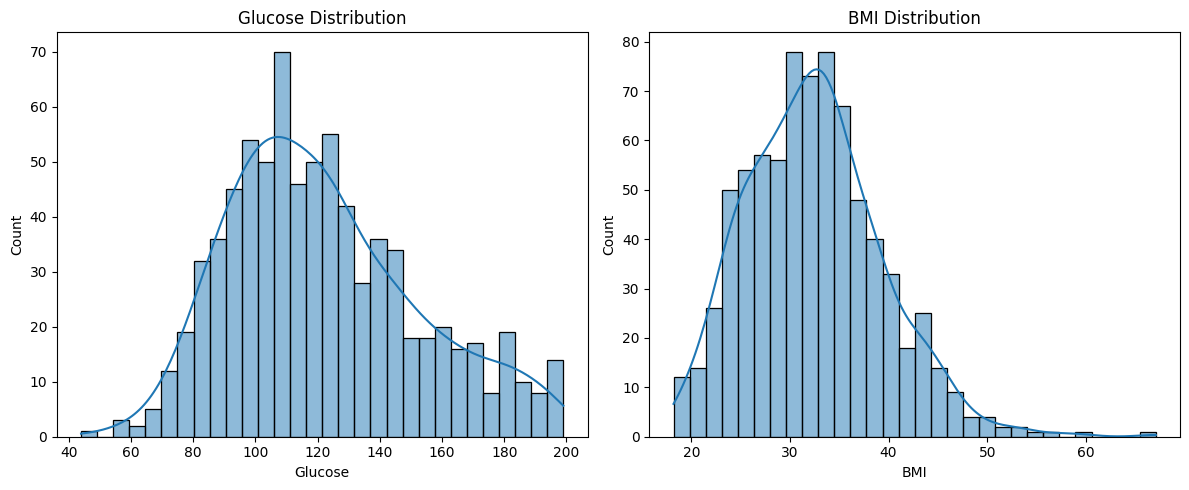

In [10]:
# ==========================================
# 4. Visualize Glucose and BMI Distributions
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title('Glucose Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

In [11]:
# ==========================================
# 5. Create 'High_BMI' Feature
# ==========================================
df['High_BMI'] = (df['BMI'] > 30).astype(int)
df[['BMI', 'High_BMI']].head()

BMI  High_BMI
0  33.6         1
1  26.6         0
2  23.3         0
3  28.1         0
4  43.1         1

In [12]:
# ==========================================
# 6. Feature Scaling (Standardization)
# ==========================================
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.907270 -0.692891  0.166619   
1    -0.844885 -1.205066      -0.528319       0.530902 -0.692891 -0.852200   
2     1.233880  2.016662      -0.693761      -1.288212 -0.692891 -1.332500   
3    -0.844885 -1.073567      -0.528319       0.154533  0.123302 -0.633881   
4    -1.141852  0.504422      -2.679076       0.907270  0.765836  1.549303   

   DiabetesPedigreeFunction       Age  High_BMI  
0                  0.468492  1.425995  0.783228  
1                 -0.365061 -0.190672 -1.276768  
2                  0.604397 -0.105584 -1.276768  
3                 -0.920763 -1.041549 -1.276768  
4                  5.484909 -0.020496  0.783228

In [13]:
# ==========================================
# 7. Split Dataset into Train and Test Sets
# ==========================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (614, 9)
Test set size: (154, 9)


In [14]:
# ==========================================
# 8. Train Logistic Regression Model
# ==========================================
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# ==========================================
# 9. Evaluate Model on Test Set
# ==========================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.7727
Precision: 0.6923
Recall:    0.6545
F1 Score:  0.6729


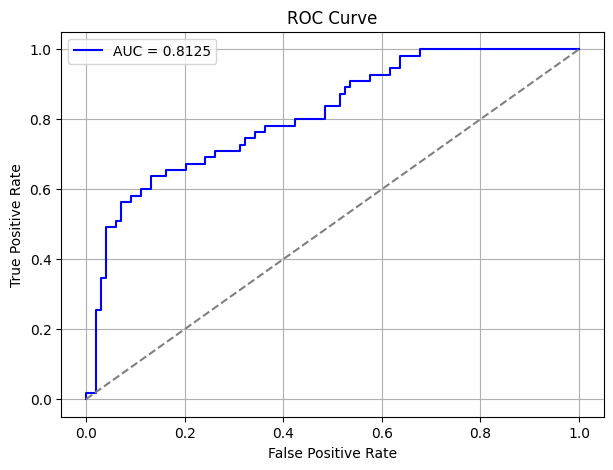

In [16]:
# ==========================================
# 10. ROC Curve and AUC Score
# ==========================================
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix

# # Assume X_train, X_test, y_train, y_test are prepared
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Step 1: Get predicted probabilities for class 1
# y_probs = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# # Step 2: Set custom threshold (e.g., 0.3)
# threshold = 0.3
# y_pred_custom = (y_probs >= threshold).astype(int)

# # Step 3: Evaluate
# print("Confusion Matrix (Threshold = 0.3):")
# print(confusion_matrix(y_test, y_pred_custom))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_custom))
